<a href="https://colab.research.google.com/github/Aman811630/Movies-and-Series-Recommended-System-/blob/main/Movies_Recommended_System_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Movies Recommended System Project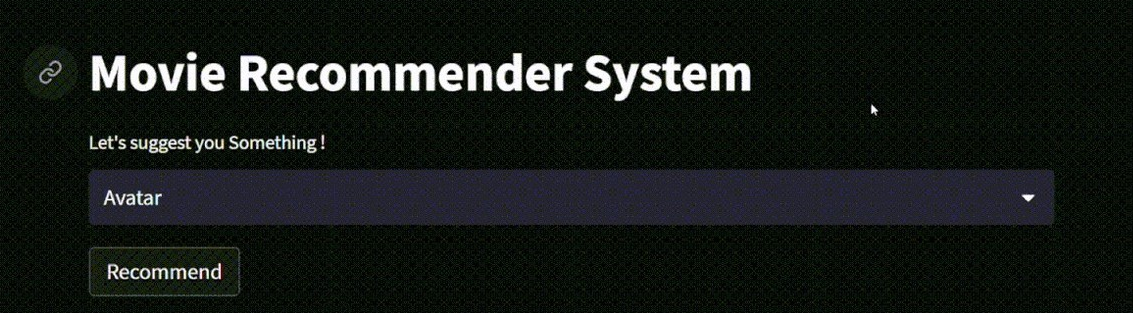

# Problem Statements :

### We have to make a movies Recommended system  model which can recommend movies to the users based on the words or tags they provide to this model ?

In [125]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [126]:
# loading the data

movies_df = pd.read_csv("/content/drive/MyDrive/movies.csv")
credit_df = pd.read_csv("/content/drive/MyDrive/credits.csv")

In [127]:
# movies data

movies_df.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


In [128]:
# movies credit data

credit_df.head(3)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


In [129]:
# shape of dataset

movies_df.shape , credit_df.shape

((4803, 20), (4803, 4))

In [130]:
# Size of dataset

movies_df.size , credit_df.size

(96060, 19212)

In [131]:
# merging the 2 datasets

movies = movies_df.merge(credit_df, on ="title")
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [132]:
movies.shape , movies.size

((4809, 23), 110607)


# **Brainstorming time**
## Deciding what columns should be needed to recommend any movie to a user, based on that we  should select the features or colums  from the dataset to make tags columns .



Based on the requirements we select following features / columns for buolding our model :-

* 'genres',
'id',
 'keywords',
  ', 'overview',
   'popularity',
   , 'release_date',
     'title',\
     cast,
     crew




In [133]:
movies_df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [134]:
movies=movies[[ 'id','title','genres', 'keywords','overview', 'cast', 'crew']]
movies


,id,title,genres,keywords,overview,cast,crew
0,19995,Avatar,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","In the 22nd century, a paraplegic Marine is di...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","Captain Barbossa, long believed to be dead, ha...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",A cryptic message from Bond’s past sends him o...,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",Following the death of District Attorney Harve...,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","John Carter is a war-weary, former military ca...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...,...,...,...
4804,9367,El Mariachi,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 5616, ""name"": ""united states\u2013mexi...",El Mariachi just wants to play his guitar and ...,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4805,72766,Newlyweds,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",[],A newlywed couple's honeymoon is upended by th...,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de..."
4806,231617,"Signed, Sealed, Delivered","[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...","[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...","""Signed, Sealed, Delivered"" introduces a dedic...","[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de..."
4807,126186,Shanghai Calling,[],[],When ambitious New York attorney Sam is sent t...,"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de..."


In [135]:
movies.shape

(4809, 7)

In [136]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        4809 non-null   int64 
 1   title     4809 non-null   object
 2   genres    4809 non-null   object
 3   keywords  4809 non-null   object
 4   overview  4806 non-null   object
 5   cast      4809 non-null   object
 6   crew      4809 non-null   object
dtypes: int64(1), object(6)
memory usage: 263.1+ KB


In [137]:
# checking missing values

movies.isnull().sum()

id          0
title       0
genres      0
keywords    0
overview    3
cast        0
crew        0
dtype: int64

we have 3 missing values / NaN values in the overview column . We can drop it because missing valyes numbers is very less .

In [138]:
movies.dropna(inplace=True)

In [139]:
movies.isnull().sum()

id          0
title       0
genres      0
keywords    0
overview    0
cast        0
crew        0
dtype: int64

In [140]:
# Checking for duplicate values

movies.duplicated().sum()


0

No duplicate value prsent i the dataset

In [141]:
movies.tail()

,id,title,genres,keywords,overview,cast,crew
4804,9367,El Mariachi,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 5616, ""name"": ""united states\u2013mexi...",El Mariachi just wants to play his guitar and ...,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4805,72766,Newlyweds,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",[],A newlywed couple's honeymoon is upended by th...,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de..."
4806,231617,"Signed, Sealed, Delivered","[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...","[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...","""Signed, Sealed, Delivered"" introduces a dedic...","[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de..."
4807,126186,Shanghai Calling,[],[],When ambitious New York attorney Sam is sent t...,"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de..."
4808,25975,My Date with Drew,"[{""id"": 99, ""name"": ""Documentary""}]","[{""id"": 1523, ""name"": ""obsession""}, {""id"": 224...",Ever since the second grade when he first saw ...,"[{""cast_id"": 3, ""character"": ""Herself"", ""credi...","[{""credit_id"": ""58ce021b9251415a390165d9"", ""de..."


# Features Engineering Time

In [142]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4806 entries, 0 to 4808
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        4806 non-null   int64 
 1   title     4806 non-null   object
 2   genres    4806 non-null   object
 3   keywords  4806 non-null   object
 4   overview  4806 non-null   object
 5   cast      4806 non-null   object
 6   crew      4806 non-null   object
dtypes: int64(1), object(6)
memory usage: 300.4+ KB


In [143]:
# data type of the colums ar object


# define a funtion to convert the dictionary format to list format


def convert(obj):
  L = []
  for i in ast.literal_eval(obj):
    L.append(i['name'])
  return L


In [144]:
# convert strint of intger to list of integer
import ast

In [145]:
# converting into list format

movies['genres'] =  movies['genres'].apply(convert)
movies.head()

,id,title,genres,keywords,overview,cast,crew
0,19995,Avatar,"[Action, Adventure, Fantasy, Science Fiction]","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","In the 22nd century, a paraplegic Marine is di...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","Captain Barbossa, long believed to be dead, ha...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[Action, Adventure, Crime]","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",A cryptic message from Bond’s past sends him o...,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",Following the death of District Attorney Harve...,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[Action, Adventure, Science Fiction]","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","John Carter is a war-weary, former military ca...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [146]:
# converting into list format


movies['keywords']= movies.keywords.apply(convert)

In [147]:
movies.head()

,id,title,genres,keywords,overview,cast,crew
0,19995,Avatar,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","In the 22nd century, a paraplegic Marine is di...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","Captain Barbossa, long believed to be dead, ha...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...",A cryptic message from Bond’s past sends him o...,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...",Following the death of District Attorney Harve...,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","John Carter is a war-weary, former military ca...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [148]:
# define a funtion to get top 3 actors name from the dictionary format to list format


def convert_3(obj):
  L = []
  counter = 0
  for i in ast.literal_eval(obj):
    if counter !=3:
      L.append(i['name'])
      counter+=1
    else:
      break
  return L

In [149]:
# converting into list format


movies['cast'] = movies.cast.apply(convert_3)

In [150]:
movies.head()

,id,title,genres,keywords,overview,cast,crew
0,19995,Avatar,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","In the 22nd century, a paraplegic Marine is di...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","Captain Barbossa, long believed to be dead, ha...","[Johnny Depp, Orlando Bloom, Keira Knightley]","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...",A cryptic message from Bond’s past sends him o...,"[Daniel Craig, Christoph Waltz, Léa Seydoux]","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...",Following the death of District Attorney Harve...,"[Christian Bale, Michael Caine, Gary Oldman]","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","John Carter is a war-weary, former military ca...","[Taylor Kitsch, Lynn Collins, Samantha Morton]","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [151]:
# define a funtion to get Director name from the dictionary format to list format


def fetch_director(obj):
  L = []
  for i in ast.literal_eval(obj):
    if i['job'] == "Director":
      L.append(i['name'])
      break
  return L

In [152]:
# converting into list format


movies['crew'] = movies['crew'].apply(fetch_director)

In [153]:
movies.head()

,id,title,genres,keywords,overview,cast,crew
0,19995,Avatar,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","In the 22nd century, a paraplegic Marine is di...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","Captain Barbossa, long believed to be dead, ha...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski]
2,206647,Spectre,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...",A cryptic message from Bond’s past sends him o...,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes]
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...",Following the death of District Attorney Harve...,"[Christian Bale, Michael Caine, Gary Oldman]",[Christopher Nolan]
4,49529,John Carter,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","John Carter is a war-weary, former military ca...","[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Andrew Stanton]


In [154]:
movies.overview[0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.'

In [155]:
# converting into list format


movies['overview'] = movies.overview.apply(lambda x:x.split())

In [156]:
movies.head()

,id,title,genres,keywords,overview,cast,crew
0,19995,Avatar,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[In, the, 22nd, century,, a, paraplegic, Marin...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Captain, Barbossa,, long, believed, to, be, d...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski]
2,206647,Spectre,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[A, cryptic, message, from, Bond’s, past, send...","[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes]
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Following, the, death, of, District, Attorney...","[Christian Bale, Michael Caine, Gary Oldman]",[Christopher Nolan]
4,49529,John Carter,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[John, Carter, is, a, war-weary,, former, mili...","[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Andrew Stanton]


In [157]:
# Removing space between name so that our model not get confused when we run our model e.g sam wordington === samwordington

movies['genres'] = movies.genres.apply(lambda x:[i.replace(' ','') for i in x])
movies['cast'] = movies.cast.apply(lambda x:[i.replace(' ','') for i in x])
movies['crew'] = movies.crew.apply(lambda x:[i.replace(' ','') for i in x])
movies['keywords'] = movies.keywords.apply(lambda x:[i.replace(' ','') for i in x])

In [158]:
movies.head()

,id,title,genres,keywords,overview,cast,crew
0,19995,Avatar,"[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[In, the, 22nd, century,, a, paraplegic, Marin...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron]
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[Captain, Barbossa,, long, believed, to, be, d...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski]
2,206647,Spectre,"[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[A, cryptic, message, from, Bond’s, past, send...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes]
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[Following, the, death, of, District, Attorney...","[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan]
4,49529,John Carter,"[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[John, Carter, is, a, war-weary,, former, mili...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton]


In [159]:
movies["tags"] = movies['overview'] + movies['cast'] + movies["crew"] + movies["keywords"]

In [160]:
movies.head()

,id,title,genres,keywords,overview,cast,crew,tags
0,19995,Avatar,"[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[In, the, 22nd, century,, a, paraplegic, Marin...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron],"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[Captain, Barbossa,, long, believed, to, be, d...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski],"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[A, cryptic, message, from, Bond’s, past, send...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes],"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[Following, the, death, of, District, Attorney...","[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan],"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[John, Carter, is, a, war-weary,, former, mili...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton],"[John, Carter, is, a, war-weary,, former, mili..."


In [161]:
movies.tags[0]

['In',
 'the',
 '22nd',
 'century,',
 'a',
 'paraplegic',
 'Marine',
 'is',
 'dispatched',
 'to',
 'the',
 'moon',
 'Pandora',
 'on',
 'a',
 'unique',
 'mission,',
 'but',
 'becomes',
 'torn',
 'between',
 'following',
 'orders',
 'and',
 'protecting',
 'an',
 'alien',
 'civilization.',
 'SamWorthington',
 'ZoeSaldana',
 'SigourneyWeaver',
 'JamesCameron',
 'cultureclash',
 'future',
 'spacewar',
 'spacecolony',
 'society',
 'spacetravel',
 'futuristic',
 'romance',
 'space',
 'alien',
 'tribe',
 'alienplanet',
 'cgi',
 'marine',
 'soldier',
 'battle',
 'loveaffair',
 'antiwar',
 'powerrelations',
 'mindandsoul',
 '3d']

In [162]:
# making new dataset with tags

df= movies[['id','title','tags']]
df.head()

,id,title,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili..."


In [163]:
df['tags'] = df.tags.apply(lambda x:' '.join(x))

<ipython-input-163-d7994808967a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tags'] = df.tags.apply(lambda x:' '.join(x))


In [164]:
df['tags'] = df.tags.apply(lambda x:x.lower())

<ipython-input-164-3694fda5c63e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tags'] = df.tags.apply(lambda x:x.lower())


In [165]:
df.tags[0]

'in the 22nd century, a paraplegic marine is dispatched to the moon pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. samworthington zoesaldana sigourneyweaver jamescameron cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d'

In [166]:
df.head()

,id,title,tags
0,19995,Avatar,"in the 22nd century, a paraplegic marine is di..."
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believed to be dead, ha..."
2,206647,Spectre,a cryptic message from bond’s past sends him o...
3,49026,The Dark Knight Rises,following the death of district attorney harve...
4,49529,John Carter,"john carter is a war-weary, former military ca..."


In [167]:
df.shape, df.size


((4806, 3), 14418)

# Model Building

### Text Vectorization

In [168]:

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=5000, stop_words= 'english')

In [169]:
vectors = cv.fit_transform(df['tags']).toarray()

In [170]:
vectors


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [171]:
vectors[0]


array([0, 0, 0, ..., 0, 0, 0])

## `Stemming`

In [172]:
import nltk

In [173]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [174]:
def stem(text):
  y = []
  for i in text.split():
    y.append(ps.stem(i))

  return " ".join(y)

In [175]:
df['tags']= df['tags'].apply(stem)
df['tags']

<ipython-input-175-bb44a09589a4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tags']= df['tags'].apply(stem)


0       in the 22nd century, a parapleg marin is dispa...
1       captain barbossa, long believ to be dead, ha c...
2       a cryptic messag from bond’ past send him on a...
3       follow the death of district attorney harvey d...
4       john carter is a war-weary, former militari ca...
                              ...                        
4804    el mariachi just want to play hi guitar and ca...
4805    a newlyw couple' honeymoon is upend by the arr...
4806    "signed, sealed, delivered" introduc a dedic q...
4807    when ambiti new york attorney sam is sent to s...
4808    ever sinc the second grade when he first saw h...
Name: tags, Length: 4806, dtype: object

In [176]:
# Now we calculate distance  uing cosine distance formula  and distance is inversionaly proportion to similarity

from sklearn.metrics.pairwise import cosine_similarity


In [177]:
similarity = cosine_similarity(vectors)

In [178]:
similarity[0]

array([1.        , 0.        , 0.        , ..., 0.        , 0.02752409,
       0.        ])

In [179]:
# sorting top 5 movies which are similar to the first movie [0].

sorted(list(enumerate(similarity[0])),reverse = True, key = lambda x:x[1])[1:6]

[(3608, 0.21320071635561044),
 (1216, 0.20769510081357428),
 (1920, 0.2059714602177749),
 (582, 0.20533080093573816),
 (539, 0.20100756305184245)]

# Funtion Creating for Users

In [180]:
# Creating a function that will provide user the title of similar movies

def recommend(movie):
  movie_index = df[df["title"]== movie].index[0]
  distances = similarity[movie_index]
  movie_list = sorted(list(enumerate(distances)),reverse = True, key = lambda x:x[1])[1:11]

  for i in movie_list:
    print(df.iloc[i[0]].title)

# Testing of the Function

In [181]:
# Testing  1 :=

recommend('Avatar')

Apollo 18
Aliens vs Predator: Requiem
Lifeforce
Battle: Los Angeles
Titan A.E.
Aliens
Independence Day
Edge of Tomorrow
Galaxina
Falcon Rising


In [182]:
# Testnig 2 :-

recommend('Batman Begins')

The Dark Knight
The Dark Knight Rises
Batman
Batman v Superman: Dawn of Justice
Batman
Batman & Robin
Batman Returns
Teenage Mutant Ninja Turtles
Batman Forever
Defendor


# Thank You ..................................................................................................